# dimenSNEon Tests

In [3]:
# First, ensure test data is downloaded
import sys, os

# TODO

WEE


In [4]:
# Load the data
import scanpy as sc
import anndata as ad
DATADIR = "data/filtered_feature_bc_matrix"
data = sc.read_10x_mtx(DATADIR, cache=True)
print("Loaded data!")

In [36]:
# Normalize counts and get highly variable genes
sc.pp.normalize_per_cell(data, counts_per_cell_after=1e4)
sc.pp.log1p(data)
sc.pp.highly_variable_genes(data, n_top_genes=100)

In [37]:
data_var = data[:, data.var['highly_variable']]
sc.pp.neighbors(data_var) # computes neighborhood graphs. Needed to run clustering.
sc.tl.leiden(data_var) # clusters cells based on expression profiles. This is needed to color cells by cluster.

In [38]:
# Create two copies of the data. One for runing with builtin, one for running with dimensneon.

data_builtin = data_var.copy()
data_dsne = data_var

In [39]:
# Run the builtin scanpy tSNE and dimension tSNE.

sc.tl.tsne(data_builtin)

/home/aaron/Projects/dimensneon/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


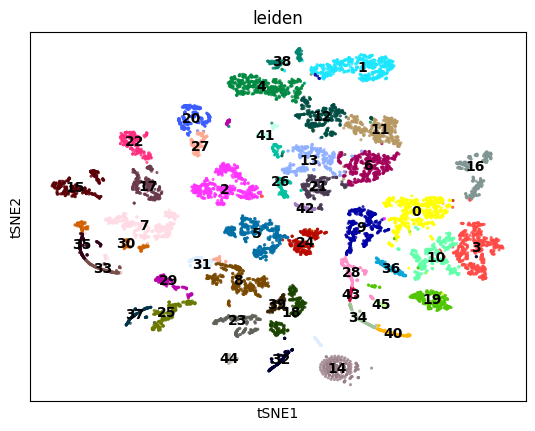

In [41]:
# Plot
sc.pl.tsne(data_builtin, color=['leiden'], legend_loc='on data', legend_fontsize=10, alpha=0.8, size=20)